In [5]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.8 MB/s eta 0:00:00


In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.7 MB/s eta 0:00:00


**Quantum Entanglement and Bell St**ates

### Entanglement is a quantum phenomenon where the measurement outcome of one qubit is directly connected to the measurement outcome of another qubit, even if the qubits are physically far apart. In an entangled state, the qubits do not behave independently. Instead, the two-qubit system behaves as a single combined state.

Why entanglement matters

Entanglement is an important resource in quantum information science because it enables:

Quantum teleportation

Quantum cryptography

Superdense coding

Distributed quantum computing

Quantum networking

Entanglement is created using quantum gates. A common method to generate entanglement is:

Apply a Hadamard gate (H) to the first qubit to create superposition.

Apply a controlled-NOT gate (CNOT) with the first qubit as control and the second qubit as target.

This produces the Bell state Φ⁺.

Bell States

Bell states are the four strongest (maximally entangled) two-qubit states. They form a complete basis for the two-qubit system.

Φ⁺ Bell State

(
∣
00
⟩
+
∣
11
⟩
)
/
2
(∣00⟩+∣11⟩)/
2
	​


The qubits always produce the same outcome when measured. If the first qubit is 0, the second is 0. If the first qubit is 1, the second is 1.

Φ⁻ Bell State

(
∣
00
⟩
−
∣
11
⟩
)
/
2
(∣00⟩−∣11⟩)/
2
	​


Same as Φ⁺, but with a relative phase of −1 applied to the
∣
11
⟩
∣11⟩ component.

Ψ⁺ Bell State

(
∣
01
⟩
+
∣
10
⟩
)
/
2
(∣01⟩+∣10⟩)/
2
	​


The qubits always produce opposite outcomes when measured. If the first qubit is 0, the second is 1. If the first qubit is 1, the second is 0.

Ψ⁻ Bell State

(
∣
01
⟩
−
∣
10
⟩
)
/
2
(∣01⟩−∣10⟩)/
2
	​


Same as Ψ⁺, but with a relative phase of −1 applied to the
∣
10
⟩
∣10⟩ component.

Circuit summary for Bell state preparation
Bell state	Gates required	Behaviour
Φ⁺	H on qubit 0, then CNOT(0 → 1)	Same outcomes
Φ⁻	H, CNOT, then Z on qubit 0	Same outcomes (with phase shift)
Ψ⁺	X on qubit 1, H on qubit 0, then CNOT	Opposite outcomes
Ψ⁻	X, H, CNOT, then Z on qubit 0	Opposite outcomes (with phase shift)
Key takeaways

Entanglement means measurement outcomes of qubits are correlated.

Bell states are the four maximally entangled two-qubit states.

Φ states give the same measurement outcomes.

Ψ states give opposite measurement outcomes.

The minus sign in Φ⁻ and Ψ⁻ represents a phase difference, which does not affect simple measurement but affects interference in larger algorithms.


Bell State Φ⁺


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Bloch sphere of qubit 0:


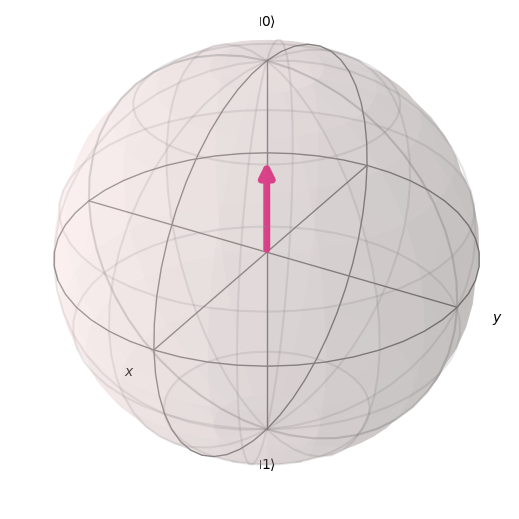

Bloch sphere of qubit 1:


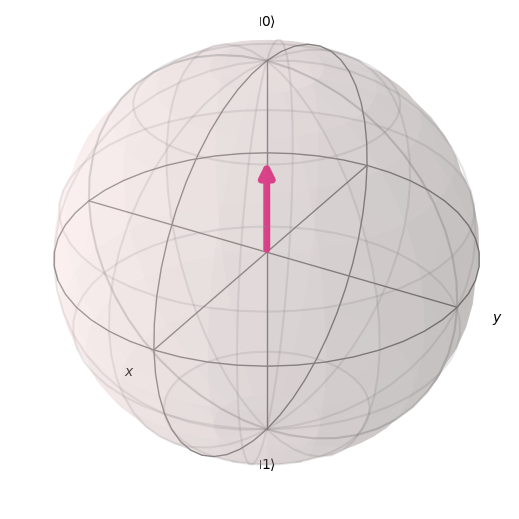

Measurement results (1024 shots):
{'00': 519, '11': 505}

Bell State Φ⁻


┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘

Bloch sphere of qubit 0:


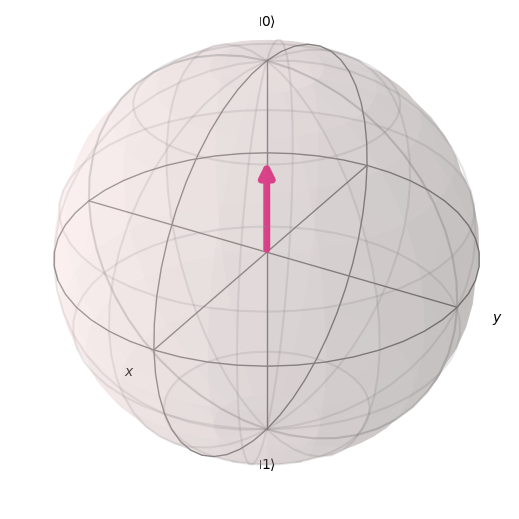

Bloch sphere of qubit 1:


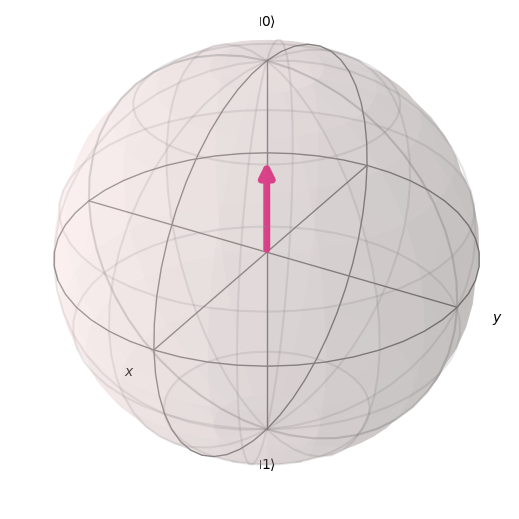

Measurement results (1024 shots):
{'00': 520, '11': 504}

Bell State Ψ⁺


┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

Bloch sphere of qubit 0:


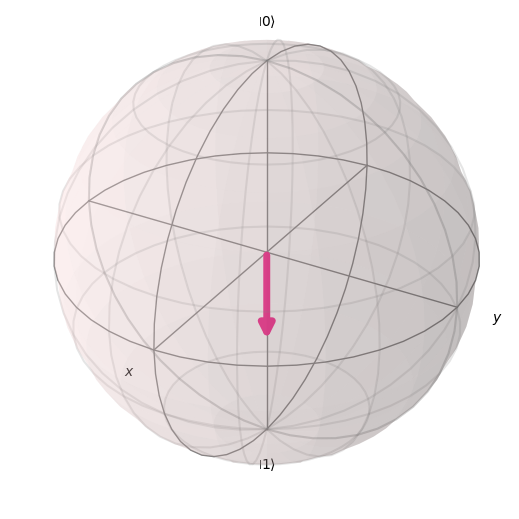

Bloch sphere of qubit 1:


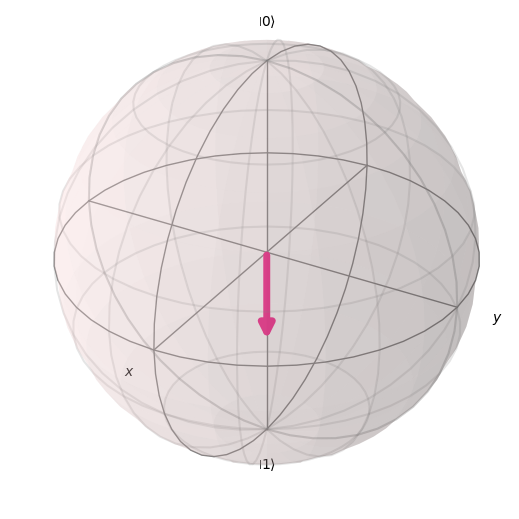

Measurement results (1024 shots):
{'01': 546, '10': 478}

Bell State Ψ⁻


┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├
     ├───┤┌─┴─┐└───┘
q_1: ┤ X ├┤ X ├─────
     └───┘└───┘

Bloch sphere of qubit 0:


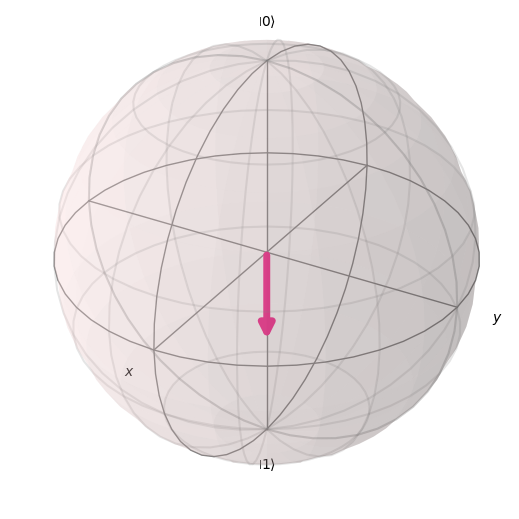

Bloch sphere of qubit 1:


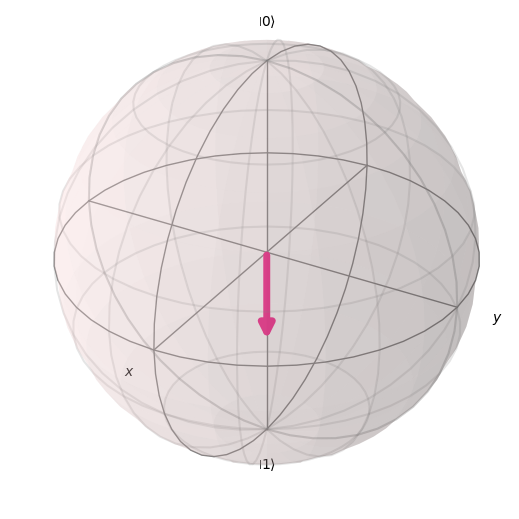

Measurement results (1024 shots):
{'10': 475, '01': 549}


In [6]:
# ------------------------------------------------------------
# Bell States with Circuits and Bloch Sphere Representation
# Created by Kasim Vali | Quantum Computing Enthusiast | India
# ------------------------------------------------------------

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector
import numpy as np

def bloch_vector(statevector, qubit_index):
    a0 = statevector.data[0::2] if qubit_index == 0 else statevector.data[1::2]
    if qubit_index == 0:
        amp0 = statevector.data[0]
        amp1 = statevector.data[2]
    else:
        amp0 = statevector.data[0]
        amp1 = statevector.data[1]
    x = 2 * np.real(np.conj(amp0) * amp1)
    y = 2 * np.imag(np.conj(amp0) * amp1)
    z = np.abs(amp0)**2 - np.abs(amp1)**2
    return [x, y, z]

def measure(qc):
    backend = Aer.get_backend("qasm_simulator")
    job = backend.run(qc, shots=1024)
    return job.result().get_counts()

def display_state(title, qc):
    print("\n" + title)
    display(qc.draw())
    sv = Statevector.from_instruction(qc)
    print("Bloch sphere of qubit 0:")
    display(plot_bloch_vector(bloch_vector(sv, 0)))
    print("Bloch sphere of qubit 1:")
    display(plot_bloch_vector(bloch_vector(sv, 1)))
    qc_measure = qc.copy()
    qc_measure.measure_all()
    print("Measurement results (1024 shots):")
    print(measure(qc_measure))


# Bell State Φ⁺ = (|00> + |11>)/√2
qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0, 1)
display_state("Bell State Φ⁺", qc_phi_plus)


# Bell State Φ⁻ = (|00> - |11>)/√2
qc_phi_minus = QuantumCircuit(2)
qc_phi_minus.h(0)
qc_phi_minus.cx(0, 1)
qc_phi_minus.z(0)
display_state("Bell State Φ⁻", qc_phi_minus)


# Bell State Ψ⁺ = (|01> + |10>)/√2
qc_psi_plus = QuantumCircuit(2)
qc_psi_plus.x(1)
qc_psi_plus.h(0)
qc_psi_plus.cx(0, 1)
display_state("Bell State Ψ⁺", qc_psi_plus)


# Bell State Ψ⁻ = (|01> - |10>)/√2
qc_psi_minus = QuantumCircuit(2)
qc_psi_minus.x(1)
qc_psi_minus.h(0)
qc_psi_minus.cx(0, 1)
qc_psi_minus.z(0)
display_state("Bell State Ψ⁻", qc_psi_minus)